#### Free Code Camp Page Views Analysis

In [1]:
import pandas as pd
import numpy as np

In [32]:
fcc_data = pd.read_csv("fcc-forum-pageviews.csv").set_index('date')
fcc_data.index = pd.to_datetime(fcc_data.index)

#### Data Cleaning
Cleaning the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [33]:
fcc_data = fcc_data[(fcc_data.value >= fcc_data.value.quantile(0.025)) &(fcc_data.value <= fcc_data.value.quantile(0.975))]
fcc_data

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [35]:
# Renaming the Column value
fcc_data.rename(columns= {'value':'views'}, inplace= True)

#### Line Plot

In [99]:
import matplotlib.pyplot as plt 
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(9, 6))
    plt.plot(fcc_data.index, fcc_data['views'])
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.ylabel('Page Views')
    plt.xlabel('Date')
    plt.show

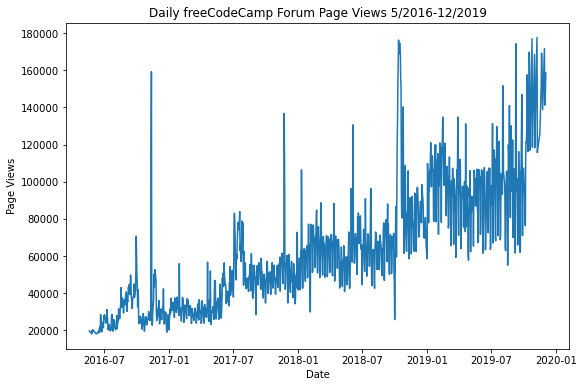

In [100]:
draw_line_plot()

Line Chart Clearly shows an upward trend in page views for Free Code Camp website. Although, there are sudden spikes that have reached 170000 page views. But year 2019 has shown consistent growth in terms of page views above 120000. 

#### Bar Plot


In [75]:
# Modifying data for monthly bar plot
fcc_data_copy = fcc_data.copy()
fcc_data_copy["month"] = fcc_data_copy.index.month
fcc_data_copy["year"]  = fcc_data_copy.index.year
months = ["January", "February", "March", "April", "May", "June", "July", "August",
          "September", "October","November", "December"]
fcc_data_copy['month'] = fcc_data_copy['month'].apply(lambda data: months[data - 1]) # -1 Cause of zero indexing 
fcc_data_copy["month"] = pd.Categorical(fcc_data_copy["month"], categories=months)


Text(0, 0.5, 'Average Page Views')

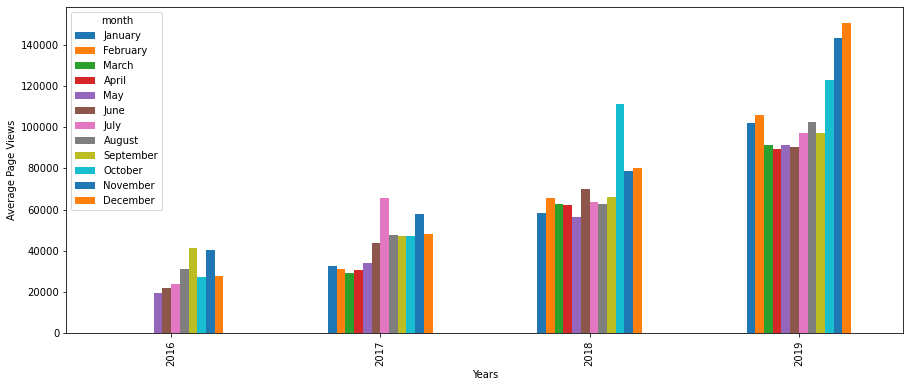

In [85]:
# Draw bar plot
fcc_pivot = pd.pivot_table( # Converting the table into a wide format 
    fcc_data_copy,
    values="views",
    index="year",
    columns="month",
    aggfunc=np.mean
    )
ax = fcc_pivot.plot(kind="bar")
    # Get a Matplotlib figure from the axes object for formatting purposes
fig = ax.get_figure()
    # Change the plot dimensions (width, height)
fig.set_size_inches(15, 6)
    # Change the axes labels
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

#### Box Plot

In [101]:
#def draw_box_plot():
    # Prepare data for box plots 
fcc_data_box = fcc_data.copy()
fcc_data_box.reset_index(inplace=True)
fcc_data_box['year'] = [d.year for d in fcc_data_box.date]
fcc_data_box['month'] = [d.strftime('%b') for d in fcc_data_box.date]

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

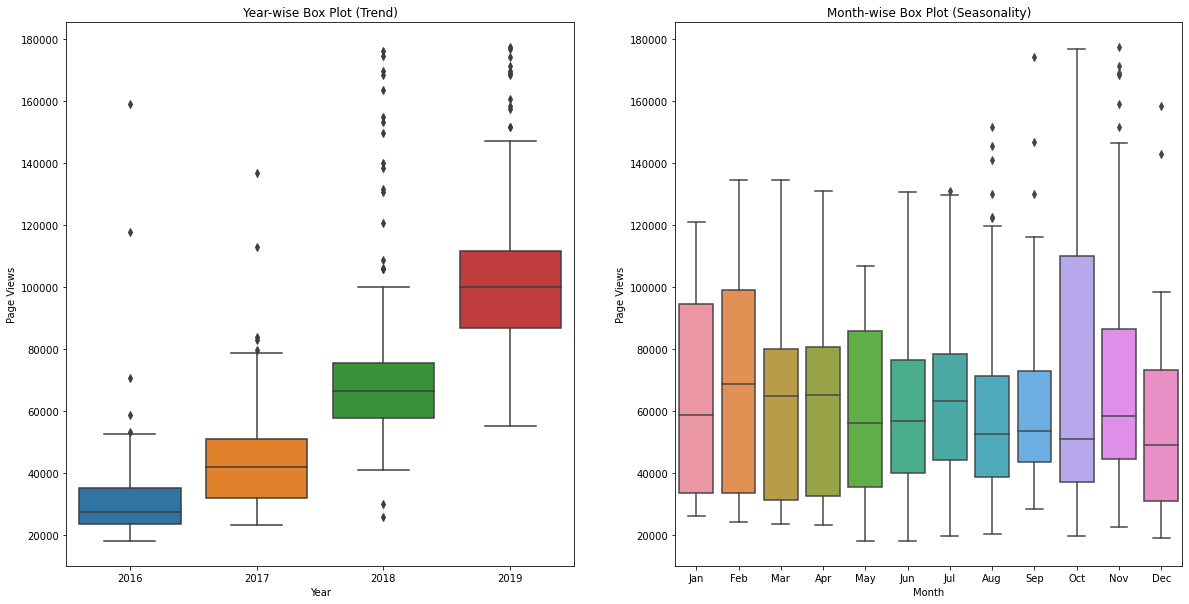

In [102]:
 # Draw box plots (using Seaborn)
import seaborn as sns
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10)
sns.boxplot(x=fcc_data_box["year"], y=fcc_data_box["views"], ax=axs[0]).set(xlabel="Year", ylabel="Page Views")
sns.boxplot(x=fcc_data_box["month"], y=fcc_data_box["views"],
            order=['Jan', 'Feb', "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
            ax = axs[1]).set(xlabel="Month", ylabel= "Page Views")
axs[0].set_title('Year-wise Box Plot (Trend)')
axs[1].set_title('Month-wise Box Plot (Seasonality)')


Box plots clearly shows that 2019 has been the most profitable year with average page views at around 0.1 million. Whereas, month wise box-plot shows that FCC website recieved highest views in October. 